In [2]:
import sys
from __future__ import division

In [3]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib


In [4]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced
from phasor.utilities.ipynb.sympy import *

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 
from phasor import mechanical

b'2017-09-22 09:45:51 -0400 (a76310c5d4476904171a3f1b18117db454719432)'
Sympy version:  1.0


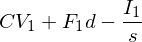

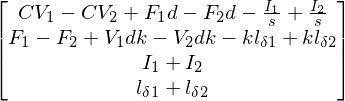

In [57]:
d = sympy.var('d')
N = sympy.var('N')
l = sympy.var('l')
A = sympy.var('A')
s = sympy.var('s')
k = sympy.var('k')
epsilon = sympy.var('epsilon')
epsilon_0 = sympy.var('epsilon_0')

d_l1 = sympy.var('l_delta_1')
F1 = sympy.var('F_1')
d_l2 = sympy.var('l_delta_2')
F2 = sympy.var('F_2')

C = sympy.var('C')
V1 = sympy.var('V_1')
I1 = sympy.var('I_1')
V2 = sympy.var('V_2')
I2 = sympy.var('I_2')

Z_e = sympy.var('Z_e', real = True)
Z_m = sympy.var('Z_m', real = True)
k_e = sympy.sqrt(1/sympy.re(Z_e))
k_m = sympy.sqrt(1/sympy.im(Z_m))
k_e = sympy.var('k_e', real = True)
k_m = sympy.var('k_m', real = True)
k_e = sympy.sympify(1)
k_m = sympy.sympify(1)

expr1 = d * F1  - I1/s + C * V1
display(expr1)
expr2 = -d_l1 * k + F1 + k * d * V1
display(expr2)

rel = sympy.Matrix([
    [C, -1/s, -C, +1/s, d, 0, -d, 0],
    [d*k, 0, -d*k, 0, 1, -k, -1, +k],
    [0,1,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,1],
])
var = sympy.Matrix([V1, I1, V2, I2, F1, d_l1, F2, d_l2])
rel * var

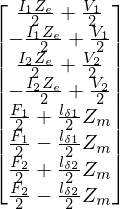

In [58]:
trans = sympy.Matrix([
    [k_e/2, k_e/2 * Z_e            ,  0,     0,                        0,     0,                        0,     0],                       
    [k_e/2, -k_e/2 * Z_e.conjugate(), 0,     0,                        0,     0,                        0,     0],                       
    [0,     0,                        k_e/2, k_e/2 * Z_e            ,  0,     0,                        0,     0],                       
    [0,     0,                        k_e/2, -k_e/2 * Z_e.conjugate(), 0,     0,                        0,     0],                       
    [0,     0,                        0,     0,                        k_m/2, k_m/2 * Z_m            ,  0,     0],                       
    [0,     0,                        0,     0,                        k_m/2, -k_m/2 * Z_m.conjugate(), 0,     0],                       
    [0,     0,                        0,     0,                        0,     0,                        k_m/2, k_m/2 * Z_m             ], 
    [0,     0,                        0,     0,                        0,     0,                        k_m/2, -k_m/2 * Z_m.conjugate()], 
])
trans * var

In [59]:
rel_ab = rel * trans**-1
rel_a = rel_ab[:,::2]
rel_b = rel_ab[:,1::2]


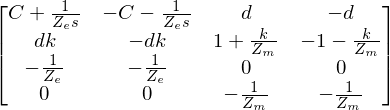

In [60]:
rel_b

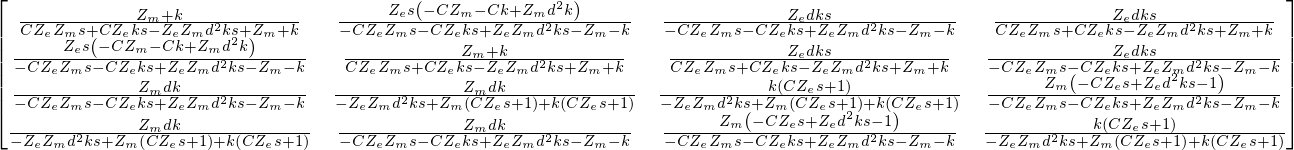

In [61]:
rel_atob = -rel_b**-1 * rel_a
rel_atob.simplify()
rel_atob

In [62]:
from sympy.utilities.lambdify import lambdastr

In [63]:
e = rel_atob[1,1]
def pyval(expr):
    sym = list(expr.free_symbols)
    return lambdastr(sym, expr).split(':')[1].strip()

In [30]:
pyval(rel_atob[0,0])

'((Z_m + k)/(C*Z_e*Z_m*s + C*Z_e*k*s - Z_e*Z_m*d**2*k*s + Z_m + k))'

In [21]:
pyval(rel_atob[1,1])

'((Z_m + k)/(C*Z_e*Z_m*s + C*Z_e*k*s - Z_e*Z_m*d**2*k*s + Z_m + k))'

In [22]:
pyval(rel_atob[0,1])

'(Z_e*s*(-C*Z_m - C*k + Z_m*d**2*k)/(-C*Z_e*Z_m*s - C*Z_e*k*s + Z_e*Z_m*d**2*k*s - Z_m - k))'

In [36]:
pyval(rel_atob[1,0])

'(Z_e*s*(-C*Z_m*k - C + d**2*k)/(-C*Z_e*Z_m*k*s - C*Z_e*s + Z_e*d**2*k*s - Z_m*k - 1))'